<a href="https://colab.research.google.com/github/AsheryMbilinyi/hackzurich/blob/master/Vontobel_Predict_answer_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and data loading

In [0]:
import sqlite3 as sql
import pandas as pd
import seaborn as sns

In [0]:
cnx = sql.connect('hack_train.db')
company = pd.read_sql_query("SELECT * FROM company", cnx)
news = pd.read_sql_query("SELECT * FROM news", cnx)
rated = pd.read_sql_query("SELECT * FROM rated", cnx)

# Preprocess and prepare X and Y

In [0]:
print(news['theme'].unique())

['Social' 'Environment' 'Governance']


In [0]:
print(news['answer_category'].unique())

['Category 1' 'Category 3' 'Category 2' 'Category 0' 'Category 4'
 'Category 5']


In [0]:
print(news['incident_type'].unique())

['NewsUpdate' 'InitialIncident' 'IncidentUpdate']


In [0]:
print(news['source'].nunique())

3303


In [0]:
print(news['sector'].unique())

['Consumer Discretionary' 'Industrials' 'Information Technology'
 'Health Care' 'Financials' 'Consumer Staples' 'Utilities' 'Materials'
 'Telecommunication Services' 'Real Estate' 'Energy']


In [0]:
print(news['location'].nunique())

1152


In [0]:
print(news['number_incidents_in_chain'].nunique())

54


In [0]:
news.head()

,id,company,country,sector,theme,event_indicator_name,answer_category,number_incidents_in_chain,incident_title,incident_type,publication_date,source,description,location,incident_date
0,0,3i Group PLC,United Kingdom,Consumer Discretionary,Social,Social Impact of Products,Category 1,2,Action offers remedy participants of 2015 job ...,NewsUpdate,16/03/2017,Company feedback,"3i, which manages 75% of the shares of Dutch r...",Belgium,15/03/2017
1,1,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,2,Airservices find high levels of chemicals in a...,InitialIncident,31/07/2018,ABC News,The Airservices Australia tested 150 firefight...,Australia,31/07/2018
2,2,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,2,Sydney aquifer contaminated with toxic chemicals,IncidentUpdate,23/12/2018,Sydney Morning Herald,Australian media outlets disclosed that the aq...,"Sydney NSW, Australia",23/12/2018
3,3,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,1,Alabama seeks to fine 3M for violating the lim...,InitialIncident,20/02/2017,Decatur Daily,The Alabama Department of Environmental Manage...,United States,20/02/2017
4,4,3M Co,United States,Consumer Discretionary,Social,Quality and Safety,Category 3,1,Alleged faults at the company's electronic ank...,InitialIncident,6/4/2017,Bloomberg,3M Company has come under scrutiny for alleged...,United States,6/4/2017


## Create extra features from incident_date

In [0]:
import datetime

In [0]:
news[['day', 'month', 'year']] = news['incident_date'].str.split('/', expand=True).astype(int)

In [0]:
news['is_weekend'] = news.apply(lambda row: datetime.datetime(row['year'], row['month'], row['day']).weekday() in [5,6], axis=1)
# news['incident_date'].apply(datetime.strptime, '%mm/%dd/%yyyy', axis=1)

In [0]:
news.head()

,id,company,country,sector,theme,event_indicator_name,answer_category,number_incidents_in_chain,incident_title,incident_type,publication_date,source,description,location,incident_date,year,month,day,week_day,is_weekend
0,0,3i Group PLC,United Kingdom,Consumer Discretionary,Social,Social Impact of Products,Category 1,2,Action offers remedy participants of 2015 job ...,NewsUpdate,16/03/2017,Company feedback,"3i, which manages 75% of the shares of Dutch r...",Belgium,15/03/2017,2017,3,15,2,False
1,1,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,2,Airservices find high levels of chemicals in a...,InitialIncident,31/07/2018,ABC News,The Airservices Australia tested 150 firefight...,Australia,31/07/2018,2018,7,31,1,False
2,2,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,2,Sydney aquifer contaminated with toxic chemicals,IncidentUpdate,23/12/2018,Sydney Morning Herald,Australian media outlets disclosed that the aq...,"Sydney NSW, Australia",23/12/2018,2018,12,23,6,True
3,3,3M Co,United States,Consumer Discretionary,Environment,"Emissions, Effluents and Waste",Category 3,1,Alabama seeks to fine 3M for violating the lim...,InitialIncident,20/02/2017,Decatur Daily,The Alabama Department of Environmental Manage...,United States,20/02/2017,2017,2,20,0,False
4,4,3M Co,United States,Consumer Discretionary,Social,Quality and Safety,Category 3,1,Alleged faults at the company's electronic ank...,InitialIncident,6/4/2017,Bloomberg,3M Company has come under scrutiny for alleged...,United States,6/4/2017,2017,4,6,3,False


In [0]:
news.columns.tolist()

['id',
 'company',
 'country',
 'sector',
 'theme',
 'event_indicator_name',
 'answer_category',
 'number_incidents_in_chain',
 'incident_title',
 'incident_type',
 'publication_date',
 'source',
 'description',
 'location',
 'incident_date',
 'year',
 'month',
 'day',
 'week_day',
 'is_weekend']

In [0]:
cols = ['theme', 'number_incidents_in_chain', 'incident_type', 'source', 'location', 'sector', 'year', 'month', 'is_weekend']
X = news[cols]
Y = pd.DataFrame(news['answer_category'])

In [0]:
X.head()

,theme,number_incidents_in_chain,incident_type,source,location,sector,year,month,is_weekend
0,Social,2,NewsUpdate,Company feedback,Belgium,Consumer Discretionary,2017,3,False
1,Environment,2,InitialIncident,ABC News,Australia,Consumer Discretionary,2018,7,False
2,Environment,2,IncidentUpdate,Sydney Morning Herald,"Sydney NSW, Australia",Consumer Discretionary,2018,12,True
3,Environment,1,InitialIncident,Decatur Daily,United States,Consumer Discretionary,2017,2,False
4,Social,1,InitialIncident,Bloomberg,United States,Consumer Discretionary,2017,4,False


In [0]:
Y.head()

,answer_category
0,Category 1
1,Category 3
2,Category 3
3,Category 3
4,Category 3


## Label encoding

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
labeled_X = X.loc[:, (X.columns != 'number_incidents_in_chain')].apply(LabelEncoder().fit_transform)
labeled_X['number_incidents_in_chain'] = X['number_incidents_in_chain']
labeled_X['is_weekend'] = X['is_weekend']
labeled_X.head()

,theme,incident_type,source,location,sector,year,month,is_weekend,number_incidents_in_chain
0,2,2,630,105,0,0,2,False,2
1,0,1,30,74,0,1,6,False,2
2,0,0,2503,987,0,1,11,True,2
3,0,1,768,1054,0,0,1,False,1
4,2,1,315,1054,0,0,3,False,1


In [0]:
Y = Y.apply(LabelEncoder().fit_transform)
Y.head()

,answer_category
0,1
1,3
2,3
3,3
4,3


In [0]:
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

X shape: (20915, 9)
Y shape: (20915, 1)


# Prediction Models

In [0]:
Y['answer_category'].value_counts()

2    8693
3    6325
1    3513
4    1669
5     558
0     157
Name: answer_category, dtype: int64

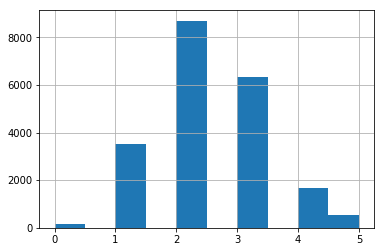

In [0]:
Y['answer_category'].hist()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.utils import compute_sample_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier    
from catboost import CatBoostClassifier, Pool, EFstrType
from sklearn.linear_model import LogisticRegression

import shap

In [0]:
X_train, X_test, y_train, y_test = train_test_split(labeled_X, Y, test_size = 0.33)

## XGBoost

In [0]:
PARAMETERS_GRID = {'learning_rate': [0.001, 0.005, 0.01],
                   'n_estimators': [50, 100, 150],
                   'max_depth': [3, 5],
                   'subsample': [0.7, 0.8]}

from sklearn.model_selection import ParameterGrid
import random

def parameter_tuning_xgb(X_train, y_train):
    best_accuracy = 0
    best_model = object
    sample_weights = compute_sample_weight('balanced', y_train)
    parameters = random.sample(list(ParameterGrid(PARAMETERS_GRID)), 15)
    
    for param_dict in parameters:
        xgb = XGBClassifier(objective = "multi:softprob", num_class = 6, learning_rate = param_dict['learning_rate'],
                           n_estimators = param_dict['n_estimators'], max_depth = param_dict['max_depth'], 
                           subsample = param_dict['subsample'])
        xgb.fit(X_train, y_train) 
        y_pred = xgb.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_model = xgb
    return best_accuracy, xgb
    

In [0]:
best_acc_xgb, best_xgb = parameter_tuning_xgb(X_train, y_train)

C:\Users\Ayya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ayya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
best_acc_xgb

0.5259345117357288

In [0]:
y_pred_xgb = best_xgb.predict(X_test)
precision_score(y_test, y_pred_xgb, average='weighted')

0.5697663090500957

### XGBoost model SHAP

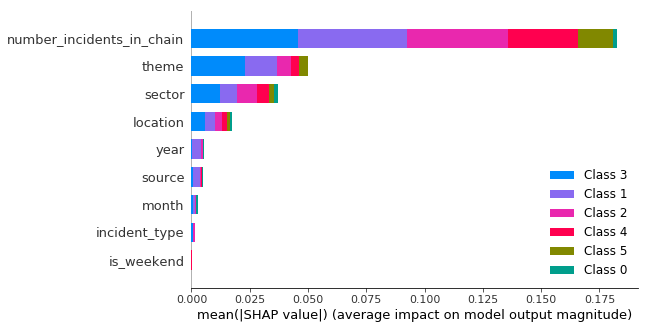

In [0]:
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

## CatBoost

In [0]:
cols = ['theme', 'number_incidents_in_chain', 'incident_type', 'source', 'location', 'sector', 'year', 'month', 'is_weekend']
X = news[cols]
Y = pd.DataFrame(news['answer_category'])

cat_features = [0, 2, 3, 4, 5]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

train_dataset = Pool(data=X_train,
                     label=y_train,
                     cat_features=cat_features)

test_dataset = Pool(data=X_test,
                    label=y_test,
                    cat_features=cat_features)

In [0]:
PARAMETERS_GRID = {
    "reg_lambda": [0, 0.2, 0.5],
    "learning_rate": [0.05 ,0.1, 0.2],
    "subsample": [0.6, 0.7, 0.8],
    "depth": [4, 6, 8]
}

from sklearn.model_selection import ParameterGrid
import random

def parameter_tuning_cat(train_dataset, test_dataset):
    best_accuracy = 0
    best_model = object
    sample_weights = compute_sample_weight('balanced', y_train)
    parameters = random.sample(list(ParameterGrid(PARAMETERS_GRID)), 5)
    
    for param_dict in parameters:
        cat = CatBoostClassifier(loss_function='MultiClass', reg_lambda = param_dict['reg_lambda'], 
                                learning_rate = param_dict['learning_rate'], iterations=500)
        cat.fit(train_dataset) 
        y_pred = cat.predict(test_dataset)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_model = cat
    return best_accuracy, cat

In [0]:
best_acc_cat, best_cat = parameter_tuning_cat(train_dataset, test_dataset)

0:	learn: 1.6881550	total: 886ms	remaining: 7m 22s
1:	learn: 1.6215560	total: 1.1s	remaining: 4m 35s
2:	learn: 1.5630322	total: 1.32s	remaining: 3m 38s
3:	learn: 1.5093357	total: 2.17s	remaining: 4m 29s
4:	learn: 1.4677212	total: 2.63s	remaining: 4m 20s
5:	learn: 1.4252405	total: 3.47s	remaining: 4m 45s
6:	learn: 1.3929719	total: 3.89s	remaining: 4m 33s
7:	learn: 1.3611125	total: 4.83s	remaining: 4m 56s
8:	learn: 1.3388314	total: 5.14s	remaining: 4m 40s
9:	learn: 1.3207898	total: 5.45s	remaining: 4m 27s
10:	learn: 1.2973027	total: 6.31s	remaining: 4m 40s
11:	learn: 1.2809644	total: 7.28s	remaining: 4m 55s
12:	learn: 1.2692304	total: 7.49s	remaining: 4m 40s
13:	learn: 1.2516113	total: 8.33s	remaining: 4m 49s
14:	learn: 1.2375907	total: 9.28s	remaining: 5m
15:	learn: 1.2319294	total: 9.42s	remaining: 4m 44s
16:	learn: 1.2235075	total: 9.83s	remaining: 4m 39s
17:	learn: 1.2125112	total: 10.7s	remaining: 4m 46s
18:	learn: 1.2029466	total: 11.2s	remaining: 4m 44s
19:	learn: 1.1930769	total:

In [0]:
best_acc_cat

0.5823293172690763

In [0]:
y_pred_cat = best_cat.predict(X_test)
precision_score(y_test, y_pred_cat, average='weighted')

0.5988034729509198

Using 15686 background data samples could cause slower run times. Consider using shap.kmeans(data, K) to summarize the background as K weighted samples.


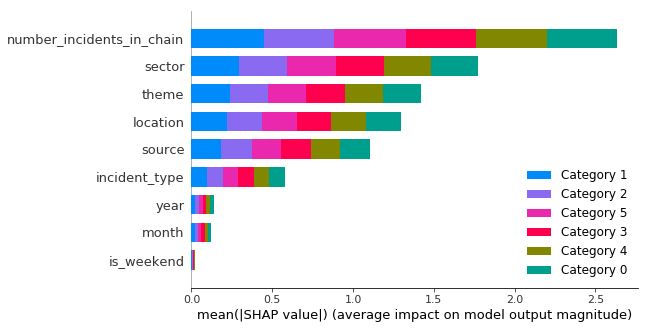

In [0]:
# explainer = shap.TreeExplainer(best_cat)
# shap_values = explainer.shap_values(X_train)
# shap.summary_plot(shap_values, X_train)
categorical_columns = ['theme', 'incident_type', 'source', 'location', 'sector']

explainer = shap.KernelExplainer(best_cat.predict_proba, X_train)
shap_values  = best_cat.get_feature_importance(Pool(X_train, y_train, cat_features=categorical_columns), type=EFstrType.ShapValues)
original_shape = shap_values.shape
shap_values_reshaped = shap_values.reshape(original_shape[1], original_shape[0], original_shape[-1])
shap.summary_plot(list(shap_values_reshaped[:,:,:-1]), features=X_train, class_names=y_train['answer_category'].unique(), plot_type='bar')

## Multiclass logistic regression

In [0]:
reg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=5000)
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

C:\Users\Ayya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ayya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
accuracy_score(y_test, y_pred_reg)

0.4723268617791944